# RECOMMENDER SYSTEM
    * based on user preferences
    * Netflix - movies, youtube videos, Amazon shoppiong products.
    * code intelliget to understand what user wants.
### 1. Popilarity based - Best on the platform - `trending`. `Formula based`     
### 2. Content based.
### 3. collaborative filtering - based on user `liking`/ `Rating`
* calculating euclidian or any other distance. and recommending teh one with the nearest point.
![](20220831182603.png) 
### 4. Hybrid - taking all the above 3 into consideration



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
books = pd.read_csv("Books.csv", low_memory=False)
users = pd.read_csv("Users.csv", low_memory=False)
ratings = pd.read_csv("Ratings.csv", low_memory=False)

C:\Users\I502147\AppData\Local\Temp\ipykernel_22868\2906776592.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")
  
refer - https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [5]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

### get the shape

In [8]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


Inference:
1. number of books = 2,71,360
2. users who have rated those books = 278858
3. No. of ratings - note- no. of ratings are higer as same user can rate more than 1 book

### MISSING DATA

In [12]:
# books.isnull() # gives if any data within the books DF is missing or not with  boolean - True or False
#better to use below
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Inference: some data missing. however, not very significant

In [16]:
print(f"USERS:\n{users.isnull().sum()}\n")
print(f"RATINGS:\n{ratings.isnull().sum()}\n")

USERS:
User-ID          0
Location         0
Age         110762
dtype: int64

RATINGS:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64



Inference: 
Users: Age details are missing in large numbers.
Ratings: nothing missing here.

## DUPLICATES?

In [18]:
books.duplicated().sum()

0

In [19]:
users.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Inference - all data is categorical

In [23]:
books["Year-Of-Publication"].describe()

count     271360
unique       118
top         2002
freq       17627
Name: Year-Of-Publication, dtype: object

In [24]:
books["Book-Author"].describe()

count              271359
unique             102023
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

In [28]:
books["Book-Author"].value_counts().head(10)

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Author, dtype: int64

In [61]:
# TODO: how to get the list of authors with more than 100 counts?

In [29]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [31]:
users["Age"].value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: Age, Length: 165, dtype: int64

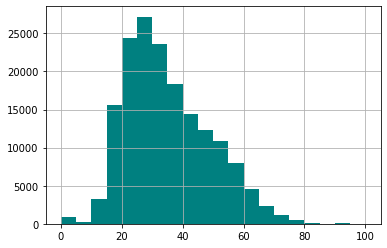

In [46]:
users["Age"].hist(bins=20, color="teal",range=(0,100));

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<AxesSubplot:>

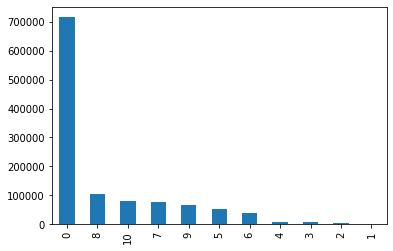

In [58]:
ratings["Book-Rating"].value_counts().plot(kind='bar')

In [60]:
# TODO: list all the books which has 10 rating

## Popularity based recommender System

#### How do we define popularity?
1. Display top 50 books based on ratings.
2. Book will be considered only if it has more than or equal to 250 votes.

* We will be using the concept of `Merge` in pandas
* to merge we need to identify the common feature in both the DataFrame to be merged on.
* using concept on `set` and `intersection`

In [62]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [63]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [64]:
type(books.columns)

pandas.core.indexes.base.Index

In [68]:
book_features = (set(books.columns))
book_features

{'Book-Author',
 'Book-Title',
 'ISBN',
 'Image-URL-L',
 'Image-URL-M',
 'Image-URL-S',
 'Publisher',
 'Year-Of-Publication'}

In [69]:
ratings_features = set(ratings.columns)

In [70]:
list(book_features.intersection(ratings_features))

['ISBN']

In [73]:
ratings_with_name = ratings.merge(books,on="ISBN")
ratings_with_name.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [75]:
ratings_with_name.shape

(1031136, 10)

In [76]:
ratings.shape

(1149780, 3)

note: the no. of rows have reduced in ratings_with_names because , there might be some books which does not have the ISBN that the ratings has.

1. we need to identify the votes on the books

In [77]:
ratings_with_name.groupby("Book-Title")

In [78]:
ratings_with_name.groupby("Book-Title").count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


In [83]:
ratings_with_name.groupby("Book-Title").count()["Book-Rating"] # shows the book and number of rsatings on that book. as we need to filter out with books more the 250 ratings

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

note: above is the list. and by using `reset_index` we can change it to DF

In [82]:
ratings_with_name.groupby("Book-Title").count()["Book-Rating"].reset_index()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


#### How to `rename` a column?
#### How to use `inplace`?

In [84]:
num_rating_df = ratings_with_name.groupby("Book-Title").count()["Book-Rating"].reset_index()

num_rating_df.rename(columns={"Book-Rating":"num_ratings"},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [95]:
avg_rating_df = ratings_with_name.groupby("Book-Title").mean()["Book-Rating"].reset_index()

avg_rating_df.rename(columns={"Book-Rating":"avg_rating"},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [96]:
popular_df = num_rating_df.merge(avg_rating_df,on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [97]:
popular_df["num_ratings"] >= 250

0         False
1         False
2         False
3         False
4         False
          ...  
241066    False
241067    False
241068    False
241069    False
241070    False
Name: num_ratings, Length: 241071, dtype: bool

In [91]:
# mask = popular_df["num_ratings"] >= 250
# popular_df[mask]

popular_df[popular_df["num_ratings"] >= 250]

,Book-Title,num_ratings,avg_ratings
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


### `sort` the above in descending order based on `avg_ratings`

## TOP 50 Books

In [101]:
# popular_df[popular_df["num_ratings"] >= 250].sort_values("avg_rating",ascending=False)
popular_df[popular_df["num_ratings"] >= 250].sort_values("avg_rating",ascending=False).head(50) # TOP 50 BOOKS

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [99]:
# sorting based on num_ratings
popular_df[popular_df["num_ratings"] >= 250].sort_values("num_ratings",ascending=False)

,Book-Title,num_ratings,avg_rating
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
160336,Silence of the Lambs,256,3.960938
178265,The Blind Assassin,255,3.007843
67832,Flesh and Blood,254,2.775591
144165,Prodigal Summer: A Novel,253,4.450593


In [103]:
popular_df = popular_df[popular_df["num_ratings"] >= 250].sort_values("avg_rating",ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [116]:
popular_df.merge(books, on="Book-Title").head(3)

,Book-Title,Book-Author_x,Image-URL-M_x,num_ratings,avg_rating,ISBN,Book-Author_y,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M_y,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...


from 186 we get 196 😁. there might be some duplication.

In [110]:
popular_df.merge(books, on="Book-Title").drop_duplicates("Book-Title").shape

(50, 10)

In [117]:
popular_df = popular_df.merge(books, on="Book-Title").drop_duplicates("Book-Title")[["Book-Title","Book-Author_y","Image-URL-M_y","num_ratings", "avg_rating"]]
popular_df

,Book-Title,Book-Author_y,Image-URL-M_y,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Build "`Collaborative Based`" Recommender system

### Approach
![](20220831223932.png)  
![](20220831224012.png)  

### Criteria:
1. educated readers - who have voted on more than 200 books
2. Book needs to be voted for min 50 times. min of 50 ratings

In [120]:
ratings_with_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [121]:
ratings_with_name.groupby("User-ID").count()["Book-Rating"]

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [125]:
ratings_with_name.groupby("User-ID").count()["Book-Rating"] >= 200

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [131]:
x = ratings_with_name.groupby("User-ID").count()["Book-Rating"] >= 200
x[x]

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 816, dtype: bool

In [132]:
x[x].index

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=816)

Inference:
* number of well read users = 816

In [133]:
well_read_users = x[x].index

In [135]:
ratings_with_name["User-ID"].isin(well_read_users)

0          False
1          False
2           True
3          False
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User-ID, Length: 1031136, dtype: bool

In [136]:
ratings_with_name[ratings_with_name["User-ID"].isin(well_read_users)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


Inference:
* well read 816 users have done ~47,00,000 ratings out of 10Lakh ratings

In [134]:
# ratings_with_name[ratings_with_name.groupby("User-ID").count()["Book-Rating"] >= 200].reset_index().sort_values("Book-Rating", ascending=False)
# ratings_with_name[ratings_with_name.groupby("User-ID").count()["Book-Rating"] >= 200]

In [137]:
filtered_rating = ratings_with_name[ratings_with_name["User-ID"].isin(well_read_users)]

In [141]:
y = filtered_rating.groupby("Book-Title").count()["Book-Rating"] >=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=707)

Inference:
* there are 707 books which have been rated more thn equal to 50 times

In [142]:
filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [147]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


no change seen.


### concept: `pivot table`

In [150]:
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")

We bought this to format we wanted when we started - 
![](20220831232716.png)  

In [151]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


### Concept: `fillna`

In [152]:
pt.fillna(0,inplace=True)

In [153]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 - rows = books = 707
 - Columns = users = 815

![](20220831233857.png)  

* Need to find out the `Euclidean distance` between different vectors
* Based on the `distance` we can identify `similar` books

In [154]:
from sklearn.metrics.pairwise import cosine_similarity

In [158]:
similarity_scores = cosine_similarity(pt)

In [159]:
similarity_scores.shape

(707, 707)

In [157]:
similarity_scores[0] # similarity score wrt. 1st book and other books

array([1.        , 0.0999137 , 0.01189468, 0.        , 0.05229234,
       0.02703559, 0.08005247, 0.133798  , 0.03177829, 0.03573298,
       0.0226271 , 0.06592522, 0.020304  , 0.09425025, 0.1304464 ,
       0.08089641, 0.10866788, 0.0496928 , 0.02453052, 0.11405415,
       0.        , 0.13965274, 0.07645776, 0.05992325, 0.08499677,
       0.        , 0.06829594, 0.13307519, 0.07404925, 0.11854319,
       0.007483  , 0.01435345, 0.        , 0.07761015, 0.04406341,
       0.0151626 , 0.09251799, 0.01776199, 0.02543351, 0.07778745,
       0.11379679, 0.0554492 , 0.08139372, 0.08254087, 0.08560054,
       0.05350252, 0.0534403 , 0.26331669, 0.09527704, 0.05861375,
       0.08728505, 0.06575169, 0.        , 0.04353225, 0.01871487,
       0.        , 0.05484345, 0.00531237, 0.07674541, 0.05085288,
       0.18422052, 0.        , 0.01208759, 0.0290784 , 0.04169477,
       0.12354122, 0.16140808, 0.        , 0.1301383 , 0.06445396,
       0.        , 0.        , 0.        , 0.10686088, 0.02734

In [160]:
# def recommend(book_name):
#     # 1. fetch index from book_name
#     return suggestions

1. fetch index from book_name

In [165]:
np.where(pt.index == "1984")

(array([0], dtype=int64),)

In [166]:
np.where(pt.index == "1984")[0][0]

0

In [167]:
np.where(pt.index == "Zen and the Art of Motorcycle Maintenance: An Inquiry into Values")[0][0]

704

### Concept: `Enumerate()`
* indexes the item

In [169]:
# similarity_scores[0]
list(enumerate(similarity_scores[0]))

[(0, 0.9999999999999998),
 (1, 0.09991370443681998),
 (2, 0.011894676421575648),
 (3, 0.0),
 (4, 0.0522923428754616),
 (5, 0.027035592129264218),
 (6, 0.08005246987594641),
 (7, 0.13379800079660079),
 (8, 0.03177829126649559),
 (9, 0.03573297811768626),
 (10, 0.022627095695491876),
 (11, 0.06592521898256122),
 (12, 0.02030399594727408),
 (13, 0.09425025422049896),
 (14, 0.13044639995428942),
 (15, 0.08089640554206895),
 (16, 0.10866787678155022),
 (17, 0.049692801008612855),
 (18, 0.024530524976685255),
 (19, 0.11405414701564792),
 (20, 0.0),
 (21, 0.13965274219894008),
 (22, 0.07645775981397283),
 (23, 0.05992324616320607),
 (24, 0.08499677059744355),
 (25, 0.0),
 (26, 0.06829593609316079),
 (27, 0.13307519236960055),
 (28, 0.0740492482078533),
 (29, 0.11854319325391062),
 (30, 0.007482996232171423),
 (31, 0.01435345067390976),
 (32, 0.0),
 (33, 0.07761014992531964),
 (34, 0.04406341116244771),
 (35, 0.015162595382829198),
 (36, 0.09251799313259884),
 (37, 0.017761989688713762),
 (38,

Inference:
* similarity score between 1984 wrt `1984` is 99.99
* similarity score between 1984 wrt. `1st to Die: A Novel` is `9.9%`

### Concepts: 
1. `Sort()`
2. `lambda`
3. `reverse`
* sort based on similarity score

In [173]:
# list(enumerate(similarity_scores[0])
# sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1]) # Note sorting happens on 0th index btu default , hence we do it on teh 1st index
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)

[(0, 0.9999999999999998),
 (47, 0.26331668558969296),
 (546, 0.25717553496685785),
 (82, 0.2306084004654351),
 (635, 0.22700367288326906),
 (552, 0.2204467783292418),
 (181, 0.21650925243379174),
 (501, 0.2142249863657188),
 (309, 0.20469829119944727),
 (344, 0.20143976888534182),
 (555, 0.19510223814372807),
 (521, 0.1945913301271719),
 (528, 0.1915092894769818),
 (489, 0.18790707816989383),
 (553, 0.18715039796581023),
 (318, 0.18515418624826524),
 (625, 0.1843874814079204),
 (599, 0.1843490366438097),
 (60, 0.18422051694704247),
 (623, 0.18094225216441853),
 (547, 0.1793562146567134),
 (648, 0.17633623834710418),
 (202, 0.17585166214330838),
 (542, 0.17528356134820602),
 (589, 0.1693494650818239),
 (538, 0.16571429613724833),
 (545, 0.16298683907968622),
 (66, 0.16140807538784901),
 (118, 0.16102364040924586),
 (269, 0.16078996341819543),
 (354, 0.1591780299676662),
 (476, 0.15690035419158116),
 (407, 0.15628767003519692),
 (591, 0.15588904638387238),
 (667, 0.15485243550124778),
 (

Note:
1. we do not want the similarity with te same book - hence, we need to remove `0`
2. we need to fetch deta of 5 books as we want to recommend `5 books`, hence we get `1-6`

In [174]:
# list(enumerate(similarity_scores[0])
# sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1]) # Note sorting happens on 0th index btu default , hence we do it on teh 1st index
# sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)
sorted(list(enumerate(similarity_scores[0])),key=lambda x:x[1],reverse=True)[1:6]

[(47, 0.26331668558969296),
 (546, 0.25717553496685785),
 (82, 0.2306084004654351),
 (635, 0.22700367288326906),
 (552, 0.2204467783292418)]

In [186]:
def recommend(book_name):
    # 1. fetch index from book_name
    index = np.where(pt.index == book_name)[0][0]
    similar_tems = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_tems:
        # print(i[0])
        print(pt.index[i[0]])


In [187]:
recommend("1984")

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [188]:
recommend("Animal Farm")

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Midnight
Second Nature
Call of the Wild


In [189]:
recommend("Midnight")

Winter Moon
Dark Rivers of the Heart
Shadowfires
While My Pretty One Sleeps
Before I Say Good-Bye


In [192]:
recommend("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [193]:
recommend("The Notebook")

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [195]:
import pickle

pickle.dump(popular_df,open('popular.pkl', 'wb'))

In [196]:
popular_df.columns

Index(['Book-Title', 'Book-Author_y', 'Image-URL-M_y', 'num_ratings',
       'avg_rating'],
      dtype='object')

In [198]:
def recommend(book_name):
    # 1. fetch index from book_name
    index = np.where(pt.index == book_name)[0][0]
    similar_tems = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_tems:
        # print(i[0])
        print(pt.index[i[0]])
        print(books[books["Book-Title"] == pt.index[i[0]]])


In [199]:
recommend("The Notebook")

A Walk to Remember
              ISBN          Book-Title      Book-Author Year-Of-Publication  \
5607    0446608955  A Walk to Remember  Nicholas Sparks                2000   
11910   0446525537  A Walk to Remember  Nicholas Sparks                1999   
138920  1570427496  A Walk to Remember  Nicholas Sparks                1999   
202811  0375728007  A Walk to Remember  Nicholas Sparks                2000   

                                  Publisher  \
5607                           Warner Books   
11910                          Warner Books   
138920              Time Warner Audio Major   
202811  Random House Large Print Publishing   

                                              Image-URL-S  \
5607    http://images.amazon.com/images/P/0446608955.0...   
11910   http://images.amazon.com/images/P/0446525537.0...   
138920  http://images.amazon.com/images/P/1570427496.0...   
202811  http://images.amazon.com/images/P/0375728007.0...   

                                           

note: the above criteria is matching with multiple `ISBN`, hence we are getting multiple books with the same name

In [202]:
def recommend(book_name):
    # 1. fetch index from book_name
    index = np.where(pt.index == book_name)[0][0]
    similar_tems = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    for i in similar_tems:
        # print(i[0])
        # print(pt.index[i[0]])
        # print(books[books["Book-Title"] == pt.index[i[0]]])
        temp_df = books[books["Book-Title"] == pt.index[i[0]]]
        print(temp_df.drop_duplicates("Book-Title")["Book-Author"])

In [203]:
recommend("The Notebook")

5607    Nicholas Sparks
Name: Book-Author, dtype: object
226    Nicholas Sparks
Name: Book-Author, dtype: object
4173    Dean R. Koontz
Name: Book-Author, dtype: object
995    Robin Cook
Name: Book-Author, dtype: object
107    Mitch Albom
Name: Book-Author, dtype: object


> Concept:
    > * `extend()` wrt. List
    

In [211]:

def recommend(book_name):
    # 1. fetch index from book_name
    index = np.where(pt.index == book_name)[0][0]
    similar_tems = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    data = []
    for i in similar_tems:
        # print(i[0])
        # print(pt.index[i[0]])
        # print(books[books["Book-Title"] == pt.index[i[0]]])
        item = []
        temp_df = books[books["Book-Title"] == pt.index[i[0]]]
        # print(temp_df.drop_duplicates("Book-Title")["Book-Author"])
        # item.append(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
        # item.append(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
        # item.append(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))

        data.append(item)
    return data

In [212]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [213]:
recommend("The Notebook")

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['One Door Away from Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet in Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg']]

In [207]:
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

> We have all the data now the way we want it from the above.

* `recommend` function needs to be places inside `recommend.html`
* The Above `recommend` function is using some DataFrames:
    1. pt
    2. books
    3. similarity_scores
* Need to ecport all 3

In [216]:
pickle.dump(pt, open("pt.pkl", "wb"))
pickle.dump(books, open("mybooks.pkl", "wb"))
pickle.dump(similarity_scores, open("similarity_scores.pkl", "wb"))